# Run-pass ratios and efficiency

In [1]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image

In [2]:
year = 2022
### Play-By-Play data for 2022
df_pbp_2022 = nfl.import_pbp_data(years=[year])

### Players
df_players = nfl.import_rosters([year])
### Teams
df_teams = nfl.import_team_desc()

2022 done.
Downcasting floats.


In [3]:
set(df_pbp_2022['game_date'])

{'2022-09-08',
 '2022-09-11',
 '2022-09-12',
 '2022-09-15',
 '2022-09-18',
 '2022-09-19',
 '2022-09-22',
 '2022-09-25',
 '2022-09-26',
 '2022-09-29',
 '2022-10-02',
 '2022-10-03',
 '2022-10-06',
 '2022-10-09',
 '2022-10-10',
 '2022-10-13',
 '2022-10-16',
 '2022-10-17',
 '2022-10-20',
 '2022-10-23',
 '2022-10-24',
 '2022-10-27',
 '2022-10-30',
 '2022-10-31',
 '2022-11-03',
 '2022-11-06',
 '2022-11-07',
 '2022-11-10',
 '2022-11-13',
 '2022-11-14',
 '2022-11-17',
 '2022-11-20',
 '2022-11-21',
 '2022-11-24',
 '2022-11-27',
 '2022-11-28',
 '2022-12-01',
 '2022-12-04',
 '2022-12-05',
 '2022-12-08',
 '2022-12-11',
 '2022-12-12',
 '2022-12-15',
 '2022-12-17',
 '2022-12-18',
 '2022-12-19',
 '2022-12-22',
 '2022-12-24',
 '2022-12-25',
 '2022-12-26',
 '2022-12-29',
 '2023-01-01',
 '2023-01-07',
 '2023-01-08'}

In [4]:
set(df_pbp_2022['week'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [5]:
cols = list(nfl.see_pbp_cols())

In [6]:
cols

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

## NFL average

In [7]:
no_runs = np.count_nonzero(df_pbp_2022['play_type']=='run')
no_passes = np.count_nonzero(df_pbp_2022['play_type']=='pass')
ratio = no_runs/no_passes

In [8]:
labels = ['Run','Pass']
values = [no_runs, no_passes]

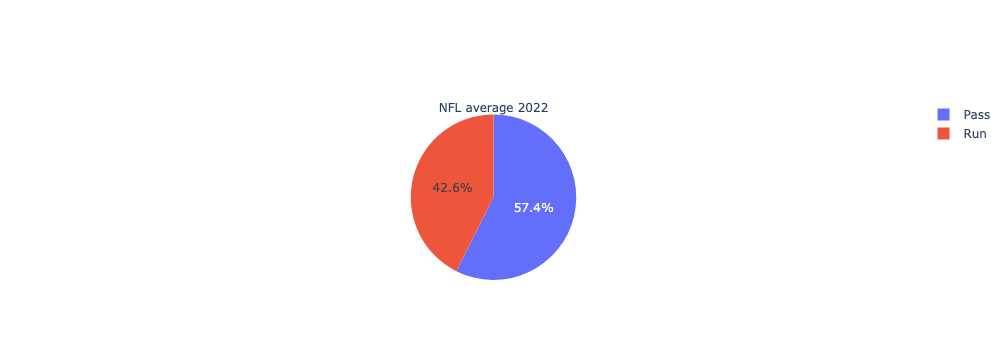

In [9]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title=f'NFL average {year}')])
fig.show()

In [10]:
print(f'NFL average run:pass ratio in {year} = '+str(np.round(no_runs/no_passes,2)))

NFL average run:pass ratio in 2022 = 0.74


## Per team

In [11]:
df_runs = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
df_passes = df_pbp_2022.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).reset_index(name='no of passes')

In [12]:
df_run_pass = df_runs.merge(df_passes, on="posteam")

In [13]:
df_run_pass = df_run_pass.merge(df_teams[["team_abbr", "team_name", "team_color", "team_color2"]], left_on="posteam", right_on="team_abbr")

In [14]:
df_run_pass['run pct'] = df_run_pass['no of runs']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['pass pct'] = df_run_pass['no of passes']/(df_run_pass['no of runs']+df_run_pass['no of passes'])*100
df_run_pass['run-pass ratio'] = df_run_pass['no of runs']/df_run_pass['no of passes']

### Who runs/passes the most?

In [15]:
df_run_pass.sort_values(by=['run-pass ratio'])

posteam  no of runs  no of passes team_abbr              team_name  \
29      TB         370           776        TB   Tampa Bay Buccaneers   
17     LAC         387           750       LAC   Los Angeles Chargers   
20     MIN         394           720       MIN      Minnesota Vikings   
6      CIN         376           658       CIN     Cincinnati Bengals   
24     NYJ         394           669       NYJ          New York Jets   
15      KC         405           680        KC     Kansas City Chiefs   
0      ARI         429           713       ARI      Arizona Cardinals   
19     MIA         375           620       MIA         Miami Dolphins   
12     HOU         391           620       HOU         Houston Texans   
13     IND         433           667       IND     Indianapolis Colts   
27     SEA         413           620       SEA       Seattle Seahawks   
3      BUF         411           607       BUF          Buffalo Bills   
16      LA         399           588        LA       Los Angeles Rams   
18      LV         424           624        LV      Las Vegas Raiders   
9      DEN         436           634       DEN         Denver Broncos   
21      NE         403           583        NE   New England Patriots   
14     JAX         438           628       JAX   Jacksonville Jaguars   
11      GB         441           595        GB      Green Bay Packers   
10     DET         469           612       DET          Detroit Lions   
26     PIT         491           610       PIT    Pittsburgh Steelers   
22      NO         455           550        NO     New Orleans Saints   
31     WAS         528           607       WAS  Washington Commanders   
8      DAL         518           583       DAL         Dallas Cowboys   
23     NYG         508           569       NYG        New York Giants   
7      CLE         519           580       CLE       Cleveland Browns   
28      SF         487           543        SF    San Francisco 49ers   
25     PHI         525           580       PHI    Philadelphia Eagles   
30     TEN         474           505       TEN       Tennessee Titans   
2      BAL         508           522       BAL       Baltimore Ravens   
4      CAR         480           491       CAR      Carolina Panthers   
1      ATL         550           450       ATL        Atlanta Falcons   
5      CHI         546           439       CHI          Chicago Bears   

   team_color team_color2    run pct   pass pct  run-pass ratio  
29    #A71930     #322F2B  32.286213  67.713787        0.476804  
17    #007BC7     #ffc20e  34.036939  65.963061        0.516000  
20    #4F2683     #FFC62F  35.368043  64.631957        0.547222  
6     #FB4F14     #000000  36.363636  63.636364        0.571429  
24    #003F2D     #000000  37.064911  62.935089        0.588939  
15    #E31837     #FFB612  37.327189  62.672811        0.595588  
0     #97233F     #000000  37.565674  62.434326        0.601683  
19    #008E97     #F58220  37.688442  62.311558        0.604839  
12    #03202F     #A71930  38.674580  61.325420        0.630645  
13    #002C5F     #a5acaf  39.363636  60.636364        0.649175  
27    #002244     #69be28  39.980639  60.019361        0.666129  
3     #00338D     #C60C30  40.373281  59.626719        0.677100  
16    #003594     #FFD100  40.425532  59.574468        0.678571  
18    #000000     #A5ACAF  40.458015  59.541985        0.679487  
9     #002244     #FB4F14  40.747664  59.252336        0.687697  
21    #002244     #C60C30  40.872211  59.127789        0.691252  
14    #006778     #000000  41.088180  58.911820        0.697452  
11    #203731     #FFB612  42.567568  57.432432        0.741176  
10    #0076B6     #B0B7BC  43.385754  56.614246        0.766340  
26    #000000     #FFB612  44.595822  55.404178        0.804918  
22    #D3BC8D     #000000  45.273632  54.726368        0.827273  
31    #5A1414     #FFB612  46.519824  53.480176        0.869852  
8     #002244     #B0B7BC  47.048138  52.951862        0.888508  
23    #0B

#### Yards per run/pass

In [16]:
df_total_yds = df_pbp_2022.groupby(['play_type','posteam'])['yards_gained'].sum()

In [17]:
df_run_pass = df_run_pass.merge(df_total_yds['run'], on="posteam")
df_run_pass = df_run_pass.merge(df_total_yds['pass'], on="posteam",suffixes=('_run','_pass'))

In [18]:
df_run_pass['yds_per_run'] = df_run_pass['yards_gained_run'].values/df_run_pass['no of runs'].values
df_run_pass['yds_per_pass_attempt'] = df_run_pass['yards_gained_pass'].values/df_run_pass['no of passes'].values

In [19]:
df_teams['team_name'][0]

'Arizona Cardinals'

In [20]:
i=0

In [21]:
df_run_pass['team_name'][i].replace(" ", "_")

'Arizona_Cardinals'

In [22]:
f'logos/{df_run_pass.team_name[i].replace(" ", "_")}_logo.svg'

'logos/Arizona_Cardinals_logo.svg'

In [23]:
f'https://en.wikipedia.org/wiki/{df_run_pass.team_name[i].replace(" ", "_")}#/media/File:{df_run_pass.team_name[i].replace(" ", "_")}_logo.svg'

'https://en.wikipedia.org/wiki/Arizona_Cardinals#/media/File:Arizona_Cardinals_logo.svg'

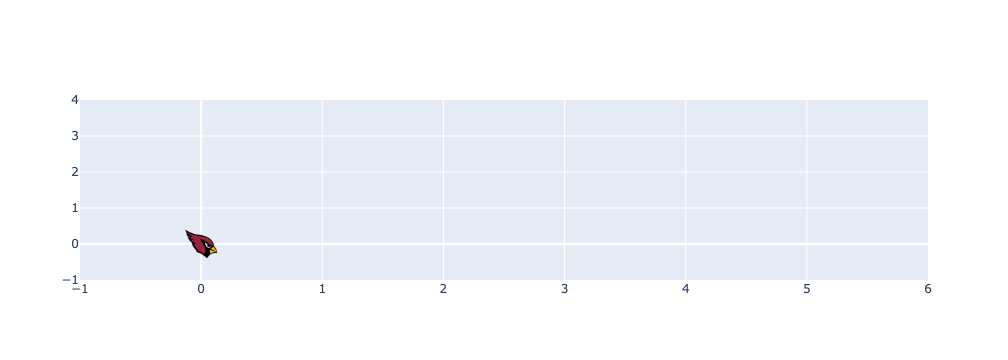

In [24]:
fig = go.Figure()

dx=0.8
marginx=0.15
marginy=0.15


pyLogo = Image.open(f'logos/{df_run_pass.team_name[i].replace(" ", "_")}_logo.png')

fig.add_layout_image(
    dict(
        source=pyLogo,
        xref="x",
        yref="y",
        x=0,
        y=0,
        sizex=dx, sizey=dx,
        xanchor="center", yanchor="middle"
    ))
        
fig.show()

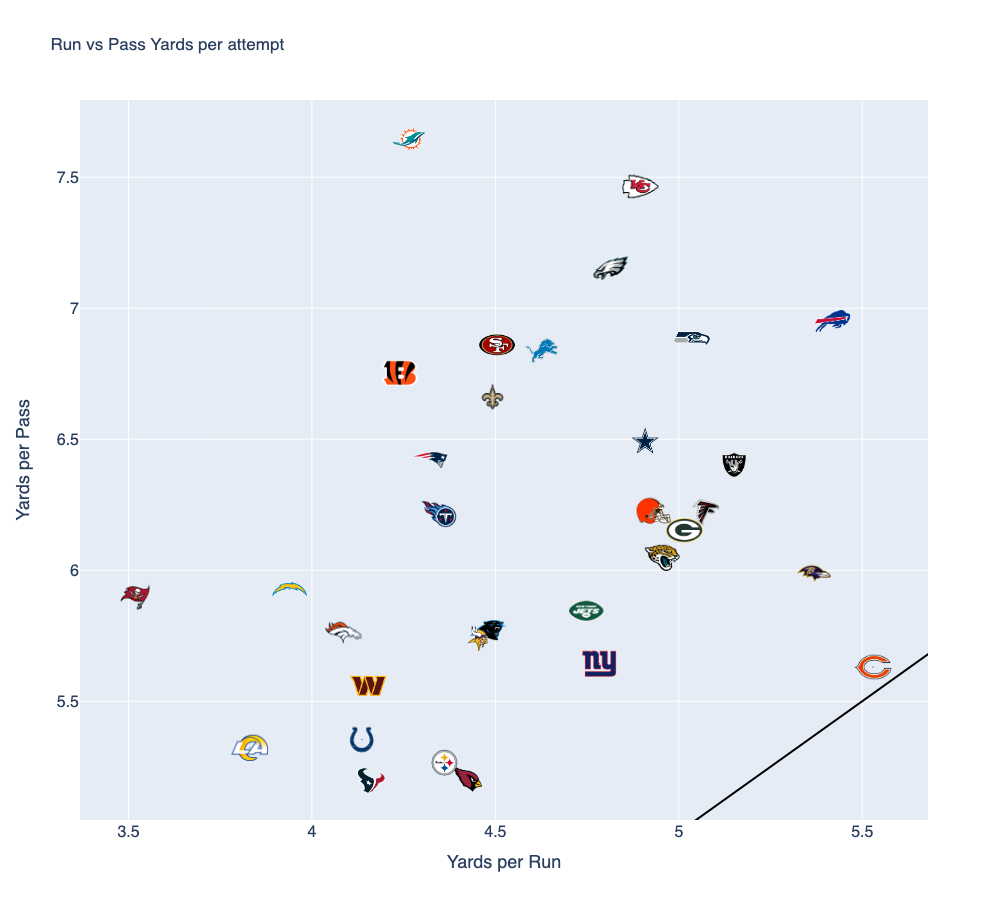

In [25]:
fig = go.Figure()

dx=0.1
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass['posteam']):
    
    pyLogo = Image.open(f'logos/{df_run_pass.team_name[i].replace(" ", "_")}_logo.png')
    
    fig.add_layout_image(
        dict(
            source=pyLogo,
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_run'][i], 
            y=df_run_pass['yds_per_pass_attempt'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['yds_per_pass_attempt'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
x=np.linspace(0,10)
y=np.linspace(0,10)

fig.add_trace(
        go.Scatter(
            x=x, 
            y=y, 
            name='1x1', 
            mode="lines",
            line = dict(color='black')
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )

fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_run'])-marginx, np.nanmax(df_run_pass['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['yds_per_pass_attempt'])-marginy, np.nanmax(df_run_pass['yds_per_pass_attempt'])+marginy])
                    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run vs Pass Yards per attempt',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Yards per Pass",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=900,
    width=1000,
    showlegend=False
)
        
fig.show()

fig.write_image("figures/run_pass.png")

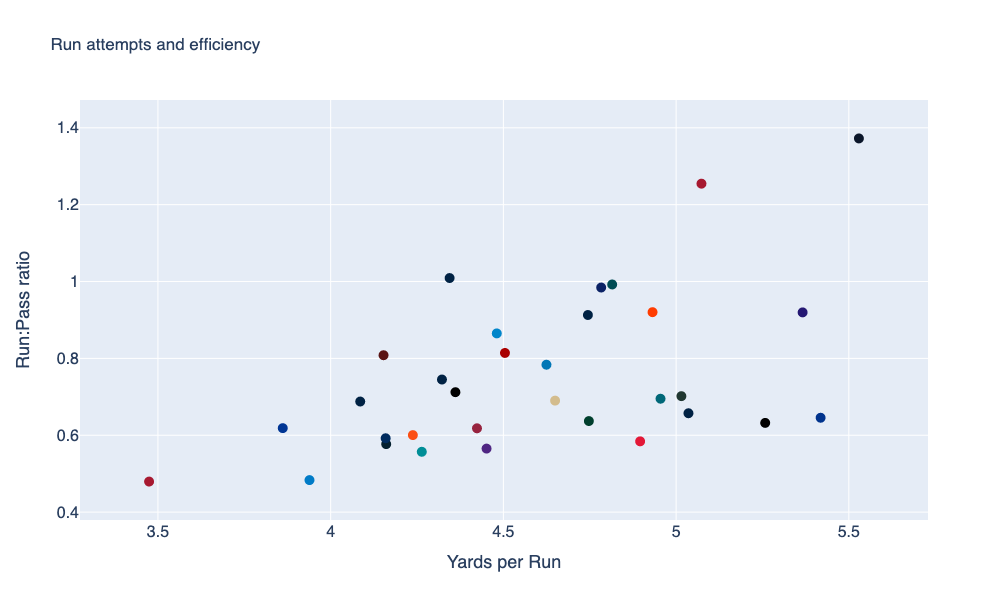

In [26]:
fig = go.Figure()

dx=0.15
marginx=0.2
marginy=0.1

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_run'][i], 
            y=df_run_pass['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_run'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=10,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_run'])-marginx, np.nanmax(df_run_pass['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['run-pass ratio'])-marginy, np.nanmax(df_run_pass['run-pass ratio'])+marginy])
 

fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run attempts and efficiency',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

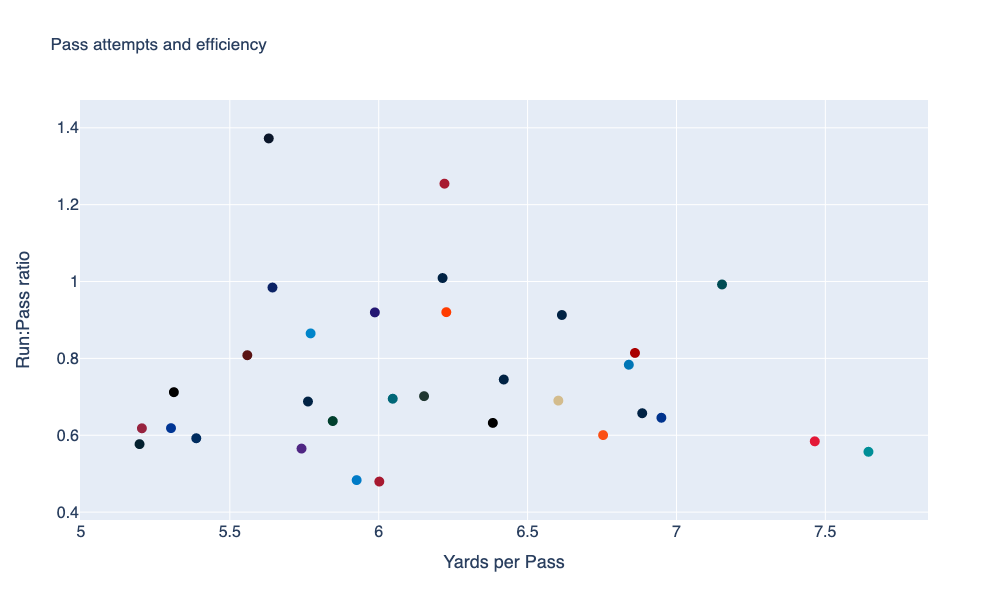

In [28]:
fig = go.Figure()

dx=0.15
marginx=0.2
marginy=0.1

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yds_per_pass_attempt'][i], 
            y=df_run_pass['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yds_per_pass_attempt'][i]], 
            y=[df_run_pass['run-pass ratio'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=10,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yds_per_pass_attempt'])-marginx, np.nanmax(df_run_pass['yds_per_pass_attempt'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['run-pass ratio'])-marginy, np.nanmax(df_run_pass['run-pass ratio'])+marginy])
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Pass attempts and efficiency',
    xaxis_title_text="Yards per Pass",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

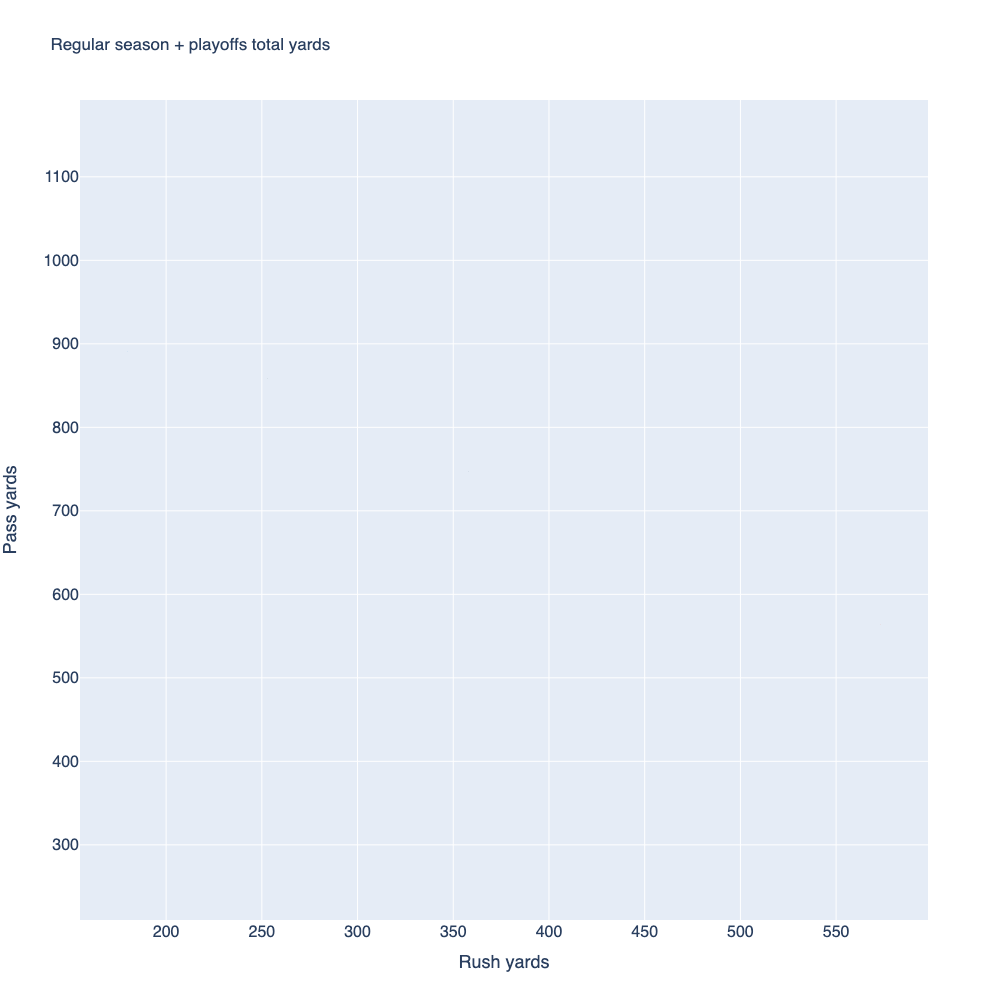

In [22]:
fig = go.Figure()

dx=25
marginx=25
marginy=25

for i,team in enumerate(df_run_pass['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass['yards_gained_run'][i], 
            y=df_run_pass['yards_gained_pass'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass['yards_gained_run'][i]], 
            y=[df_run_pass['yards_gained_pass'][i]], 
            name=df_run_pass['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass['yards_gained_run'])-marginx, np.nanmax(df_run_pass['yards_gained_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass['yards_gained_pass'])-marginy, np.nanmax(df_run_pass['yards_gained_pass'])+marginy])

# for i in range(len(df_run_pass)):
#     fig.add_trace(
#         go.Scatter(
#             x=[df_run_pass['yards_gained_run'][i]], 
#             y=[df_run_pass['yards_gained_pass'][i]], 
#             name=df_run_pass['posteam'][i], 
#             mode="markers", 
#             marker=dict(size=15,
#                         color=df_run_pass['team_color'][i],
#                         symbol=df_run_pass['marker_style'][i])
#             # fill=df_run_pass['team_color'][i],
#             # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
#         )
#     )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Regular season + playoffs total yards',
    xaxis_title_text="Rush yards",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Pass yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000,
    showlegend=False
)
        
fig.show()

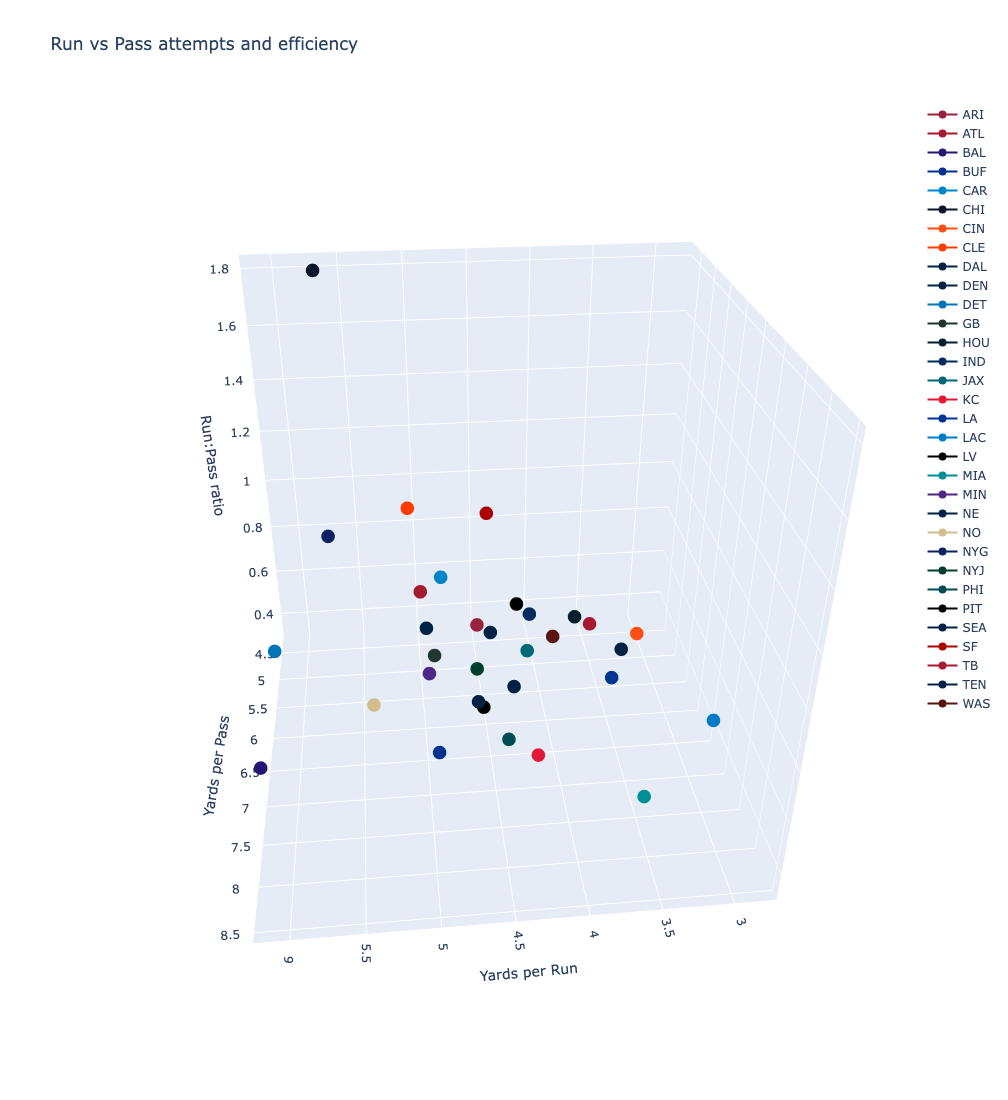

In [23]:
fig = go.Figure()

for i in range(len(df_run_pass)):
    fig.add_trace(
        go.Scatter3d(x=[df_run_pass['yds_per_run'][i]], 
                     y=[df_run_pass['yds_per_pass_attempt'][i]],
                     z=[df_run_pass['run-pass ratio'][i]],
                     name=df_run_pass['posteam'][i], 
                    # mode="markers", 
                    marker=dict(size=8,
                        color=df_run_pass['team_color'][i])))
# fig.update_layout(
#     font_family="Averta, sans-serif",
#     hoverlabel_font_family="Averta, sans-serif",
#     xaxis_title_text="Yards per Run",
#     xaxis_title_font_size=18,
#     xaxis_tickfont_size=16,
#     yaxis_title_text="Yards per Pass",
#     yaxis_title_font_size=18,
#     yaxis_tickfont_size=16,
#     hoverlabel_font_size=16,
#     legend_font_size=16,
#     height=1000,
#     width=1000
# )

fig.update_layout(scene_aspectmode='cube',
                  title='Run vs Pass attempts and efficiency',
                 scene = dict(
                    xaxis_title='Yards per Run',
                    yaxis_title='Yards per Pass',
                    zaxis_title='Run:Pass ratio'),
                 width=1100,
                 height=1100)


fig.show()

## When up vs. when down

In [24]:
df_pbp_2022[['total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post']]

total_home_score  total_away_score  posteam_score  defteam_score  \
0                  0.0               0.0            NaN            NaN   
1                  0.0               0.0            0.0            0.0   
2                  0.0               0.0            0.0            0.0   
3                  0.0               0.0            0.0            0.0   
4                  0.0               0.0            0.0            0.0   
...                ...               ...            ...            ...   
8695              27.0              15.0            NaN            NaN   
8696              27.0              15.0           15.0           27.0   
8697              27.0              15.0           27.0           15.0   
8698              27.0              15.0           27.0           15.0   
8699              27.0              15.0            NaN            NaN   

      score_differential  posteam_score_post  defteam_score_post  \
0                    NaN                 NaN                 NaN   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
8695                 NaN                 NaN                 NaN   
8696               -12.0                15.0                27.0   
8697                12.0                27.0                15.0   
8698                12.0                27.0                15.0   
8699                 NaN                 NaN                 NaN   

      score_differential_post  
0                         NaN  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
8695                      NaN  
8696                    -12.0  
8697                     12.0  
8698                     12.0  
8699                      NaN  

[8700 rows x 8 columns]

In [25]:
df_pbp_down = df_pbp_2022[df_pbp_2022['score_differential']<0]

## NFL average

In [26]:
no_runs_down = np.count_nonzero(df_pbp_down['play_type']=='run')
no_passes_down = np.count_nonzero(df_pbp_down['play_type']=='pass')
ratio = no_runs_down/no_passes_down

In [27]:
labels = ['Run','Pass']
values = [no_runs_down, no_passes_down]

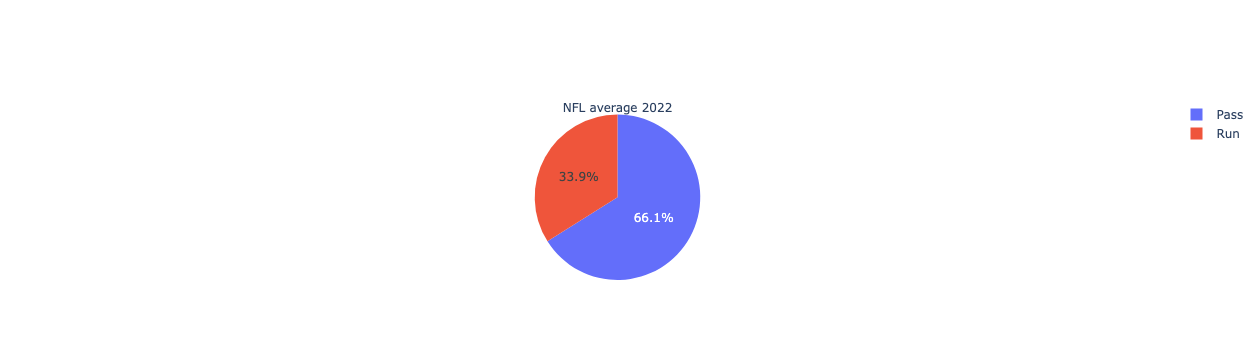

In [28]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title=f'NFL average {year}')])
fig.show()

In [29]:
print(f'NFL average run:pass ratio when down in {year} = '+str(np.round(no_runs_down/no_passes_down,2)))

NFL average run:pass ratio when down in 2022 = 0.51


## Per team

In [30]:
df_runs_down = df_pbp_down.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
df_passes_down = df_pbp_down.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).reset_index(name='no of passes')

In [31]:
df_run_pass_down = df_runs_down.merge(df_passes_down, on="posteam")

In [32]:
df_run_pass_down = df_run_pass_down.merge(df_teams[["team_abbr", "team_color", "team_color2"]], left_on="posteam", right_on="team_abbr")

In [33]:
df_run_pass_down['run pct'] = df_run_pass_down['no of runs']/(df_run_pass_down['no of runs']+df_run_pass_down['no of passes'])*100
df_run_pass_down['pass pct'] = df_run_pass_down['no of passes']/(df_run_pass_down['no of runs']+df_run_pass_down['no of passes'])*100
df_run_pass_down['run-pass ratio'] = df_run_pass_down['no of runs']/df_run_pass_down['no of passes']

### Who runs/passes the most?

In [34]:
df_run_pass_down.sort_values(by=['run-pass ratio'])

posteam  no of runs  no of passes team_abbr team_color team_color2  \
17     LAC          13            57       LAC    #007BC7     #ffc20e   
24     NYJ          48           158       NYJ    #003F2D     #000000   
3      BUF           6            18       BUF    #00338D     #C60C30   
18      LV          30            90        LV    #000000     #A5ACAF   
8      DAL          14            42       DAL    #002244     #B0B7BC   
14     JAX          13            39       JAX    #006778     #000000   
22      NO          33            90        NO    #D3BC8D     #000000   
16      LA          17            46        LA    #003594     #FFD100   
27     SEA          22            58       SEA    #002244     #69be28   
28      SF           8            21        SF    #AA0000     #B3995D   
15      KC          18            46        KC    #E31837     #FFB612   
31     WAS          45           115       WAS    #5A1414     #FFB612   
20     MIN          32            80       MIN    #4F2683     #FFC62F   
29      TB          28            67        TB    #A71930     #322F2B   
13     IND          36            81       IND    #002C5F     #a5acaf   
0      ARI          68           146       ARI    #97233F     #000000   
19     MIA          52           103       MIA    #008E97     #F58220   
10     DET          18            33       DET    #0076B6     #B0B7BC   
11      GB          28            50        GB    #203731     #FFB612   
6      CIN          57            95       CIN    #FB4F14     #000000   
12     HOU          30            46       HOU    #03202F     #A71930   
9      DEN          60            92       DEN    #002244     #FB4F14   
7      CLE          11            16       CLE    #FF3C00     #311D00   
26     PIT          34            49       PIT    #000000     #FFB612   
21      NE          44            61        NE    #002244     #C60C30   
4      CAR          31            42       CAR    #0085CA     #000000   
25     PHI          10            12       PHI    #004C54     #A5ACAF   
23     NYG          51            61       NYG    #0B2265     #A71930   
30     TEN          24            26       TEN    #002244     #4B92DB   
1      ATL          43            45       ATL    #A71930     #000000   
2      BAL          10            10       BAL    #241773     #9E7C0C   
5      CHI          57            33       CHI    #0B162A     #C83803   

      run pct   pass pct  run-pass ratio  
17  18.571429  81.428571        0.228070  
24  23.300971  76.699029        0.303797  
3   25.000000  75.000000        0.333333  
18  25.000000  75.000000        0.333333  
8   25.000000  75.000000        0.333333  
14  25.000000  75.000000        0.333333  
22  26.829268  73.170732        0.366667  
16  26.984127  73.015873        0.369565  
27  27.500000  72.500000        0.379310  
28  27.586207  72.413793        0.380952  
15  28.125000  71.875000        0.391304  
31  28.125000  71.875000        0.391304  
20  28.571429  71.428571        0.400000  
29  29.473684  70.526316        0.417910  
13  30.769231  69.230769        0.444444  
0   31.775701  68.224299        0.465753  
19  33.548387  66.451613        0.504854  
10  35.294118  64.705882        0.545455  
11  35.897436  64.102564        0.560000  
6   37.500000  62.500000        0.600000  
12  39.473684  60.526316        0.652174  
9   39.473684  60.526316        0.652174  
7   40.740741  59.259259        0.687500  
26  40.963855  59.036145        0.693878  
21  41.904762  58.095238        0.721311  
4   42.465753  57.534247        0.738095  
25  45.454545  54.545455        0.833333  
23  45.535714  54.464286        0.836066  
30  48.000000  52.000000        0.923077  
1   48.863636  51.136364        0.955556  
2   50.000000  50.000000        1.000000  
5   63.333333  36.666667        1.727273

#### Yards per run/pass

In [35]:
df_total_yds_down = df_pbp_down.groupby(['play_type','posteam'])['yards_gained'].sum()

In [36]:
df_run_pass_down = df_run_pass_down.merge(df_total_yds_down['run'], on="posteam")
df_run_pass_down = df_run_pass_down.merge(df_total_yds_down['pass'], on="posteam",suffixes=('_run','_pass'))

In [37]:
df_run_pass_down['yds_per_run'] = df_run_pass_down['yards_gained_run'].values/df_run_pass_down['no of runs'].values
df_run_pass_down['yds_per_pass_attempt'] = df_run_pass_down['yards_gained_pass'].values/df_run_pass_down['no of passes'].values

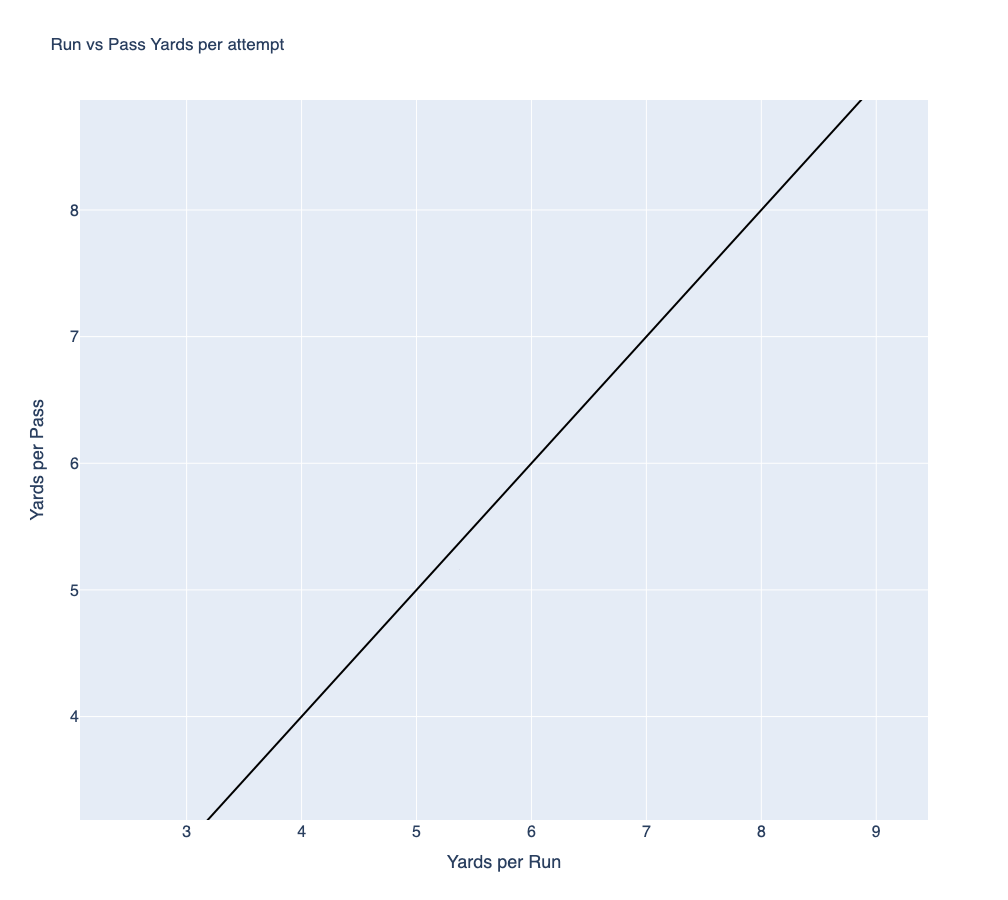

In [38]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass_down['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_down['yds_per_run'][i], 
            y=df_run_pass_down['yds_per_pass_attempt'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_down['yds_per_run'][i]], 
            y=[df_run_pass_down['yds_per_pass_attempt'][i]], 
            name=df_run_pass_down['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_down['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
x=np.linspace(0,10)
y=np.linspace(0,10)

fig.add_trace(
        go.Scatter(
            x=x, 
            y=y, 
            name='1x1', 
            mode="lines",
            line = dict(color='black')
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )

fig.update_xaxes(range=[np.nanmin(df_run_pass_down['yds_per_run'])-marginx, np.nanmax(df_run_pass_down['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_down['yds_per_pass_attempt'])-marginy, np.nanmax(df_run_pass_down['yds_per_pass_attempt'])+marginy])
                    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run vs Pass Yards per attempt',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Yards per Pass",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=900,
    width=1000,
    showlegend=False
)
        
fig.show()

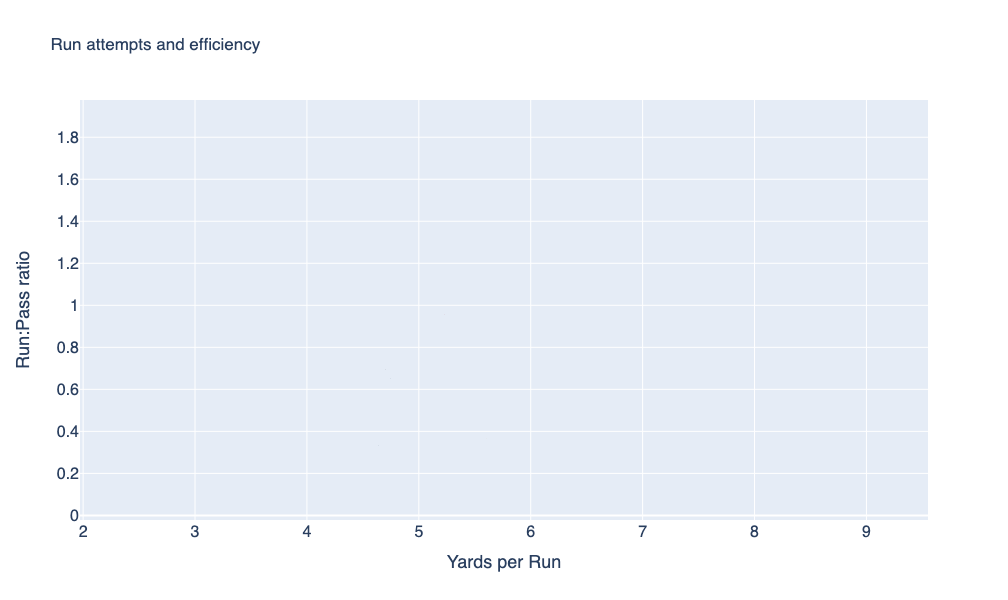

In [39]:
fig = go.Figure()

dx=0.25
marginx=0.25
marginy=0.25

for i,team in enumerate(df_run_pass_down['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_down['yds_per_run'][i], 
            y=df_run_pass_down['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_down['yds_per_run'][i]], 
            y=[df_run_pass_down['run-pass ratio'][i]], 
            name=df_run_pass_down['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_down['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_down['yds_per_run'])-marginx, np.nanmax(df_run_pass_down['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_down['run-pass ratio'])-marginy, np.nanmax(df_run_pass_down['run-pass ratio'])+marginy])
 

fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run attempts and efficiency',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

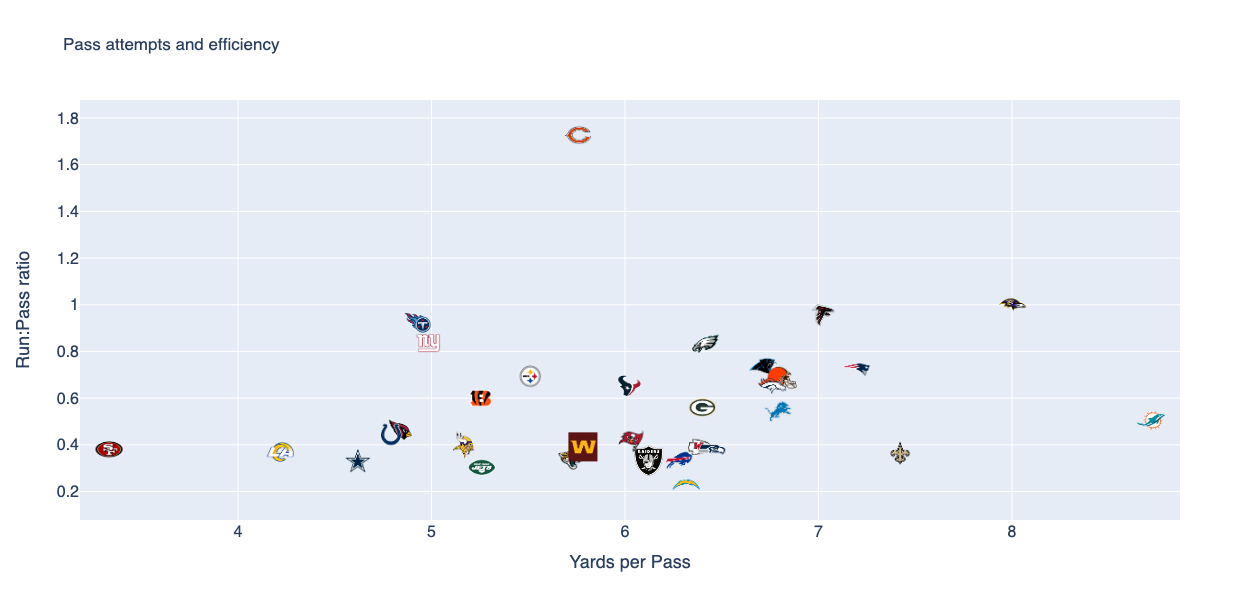

In [40]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass_down['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_down['yds_per_pass_attempt'][i], 
            y=df_run_pass_down['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_down['yds_per_pass_attempt'][i]], 
            y=[df_run_pass_down['run-pass ratio'][i]], 
            name=df_run_pass_down['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_down['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_down['yds_per_pass_attempt'])-marginx, np.nanmax(df_run_pass_down['yds_per_pass_attempt'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_down['run-pass ratio'])-marginy, np.nanmax(df_run_pass_down['run-pass ratio'])+marginy])
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Pass attempts and efficiency',
    xaxis_title_text="Yards per Pass",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

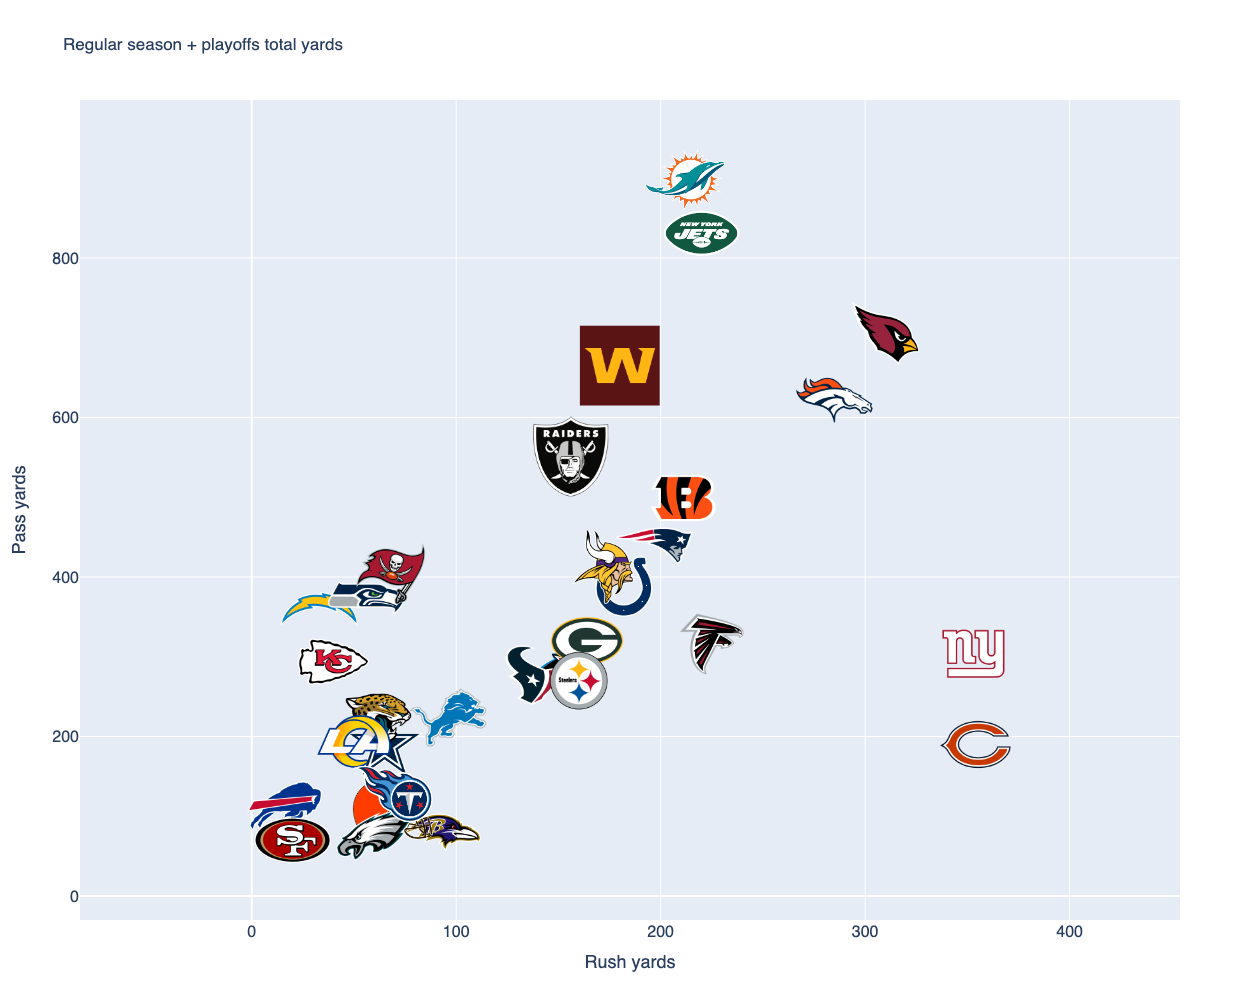

In [41]:
fig = go.Figure()

dx=100
marginx=100
marginy=100

for i,team in enumerate(df_run_pass_down['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_down['yards_gained_run'][i], 
            y=df_run_pass_down['yards_gained_pass'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_down['yards_gained_run'][i]], 
            y=[df_run_pass_down['yards_gained_pass'][i]], 
            name=df_run_pass_down['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_down['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_down['yards_gained_run'])-marginx, np.nanmax(df_run_pass_down['yards_gained_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_down['yards_gained_pass'])-marginy, np.nanmax(df_run_pass_down['yards_gained_pass'])+marginy])

# for i in range(len(df_run_pass)):
#     fig.add_trace(
#         go.Scatter(
#             x=[df_run_pass['yards_gained_run'][i]], 
#             y=[df_run_pass['yards_gained_pass'][i]], 
#             name=df_run_pass['posteam'][i], 
#             mode="markers", 
#             marker=dict(size=15,
#                         color=df_run_pass['team_color'][i],
#                         symbol=df_run_pass['marker_style'][i])
#             # fill=df_run_pass['team_color'][i],
#             # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
#         )
#     )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Regular season + playoffs total yards',
    xaxis_title_text="Rush yards",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Pass yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000,
    showlegend=False
)
        
fig.show()

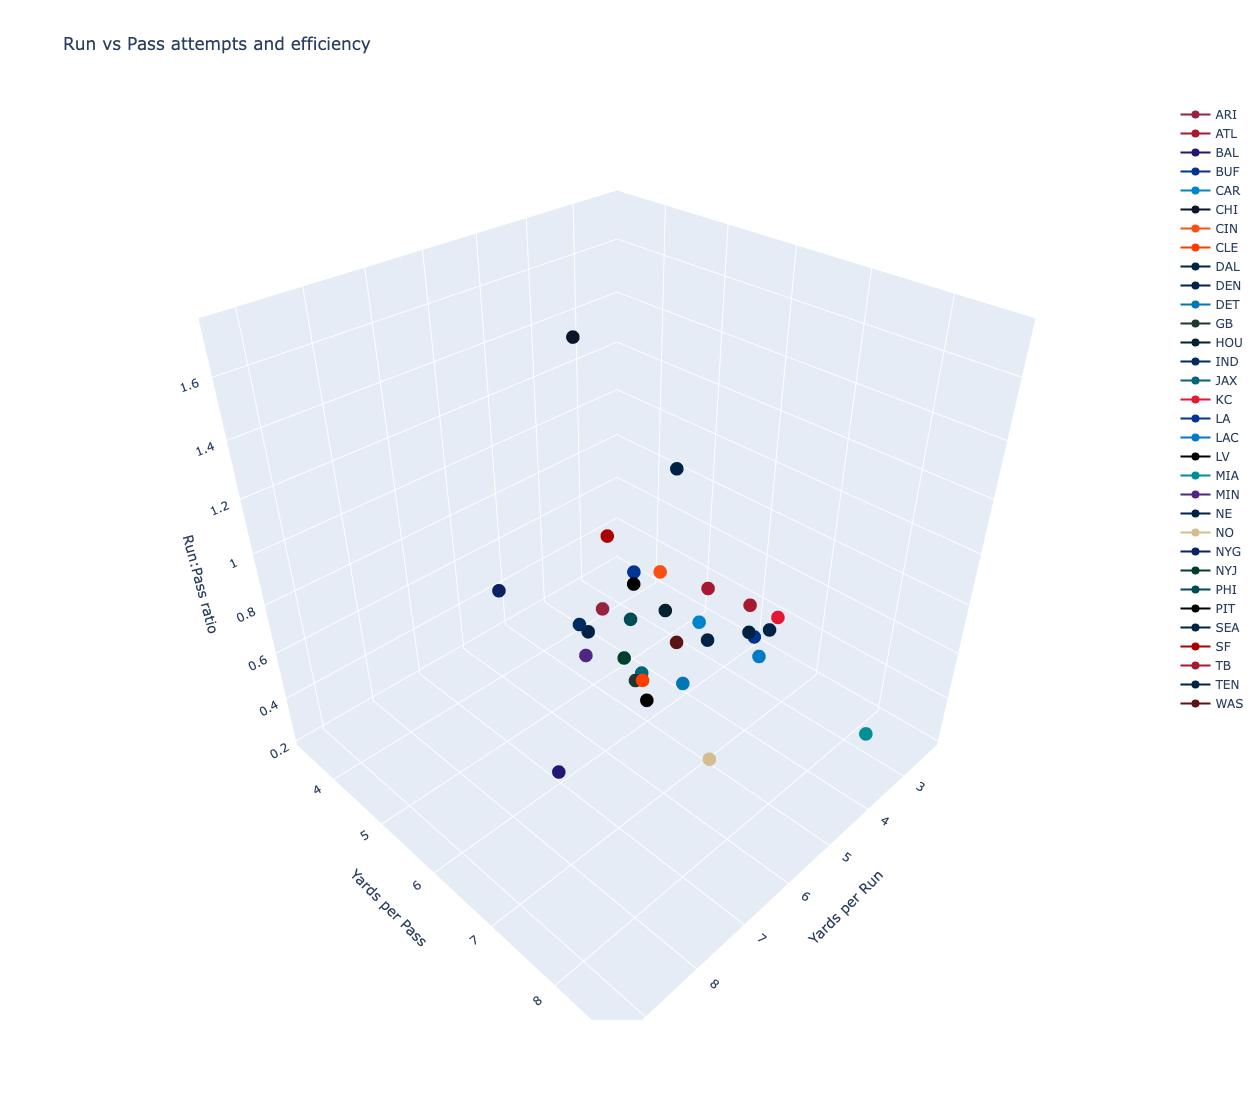

In [42]:
fig = go.Figure()

for i in range(len(df_run_pass_down)):
    fig.add_trace(
        go.Scatter3d(x=[df_run_pass_down['yds_per_run'][i]], 
                     y=[df_run_pass_down['yds_per_pass_attempt'][i]],
                     z=[df_run_pass_down['run-pass ratio'][i]],
                     name=df_run_pass_down['posteam'][i], 
                    # mode="markers", 
                    marker=dict(size=8,
                        color=df_run_pass_down['team_color'][i])))
# fig.update_layout(
#     font_family="Averta, sans-serif",
#     hoverlabel_font_family="Averta, sans-serif",
#     xaxis_title_text="Yards per Run",
#     xaxis_title_font_size=18,
#     xaxis_tickfont_size=16,
#     yaxis_title_text="Yards per Pass",
#     yaxis_title_font_size=18,
#     yaxis_tickfont_size=16,
#     hoverlabel_font_size=16,
#     legend_font_size=16,
#     height=1000,
#     width=1000
# )

fig.update_layout(scene_aspectmode='cube',
                  title='Run vs Pass attempts and efficiency',
                 scene = dict(
                    xaxis_title='Yards per Run',
                    yaxis_title='Yards per Pass',
                    zaxis_title='Run:Pass ratio'),
                 width=1100,
                 height=1100)


fig.show()

## When up

In [43]:
df_pbp_2022[['total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post']]

total_home_score  total_away_score  posteam_score  defteam_score  \
0                  0.0               0.0            NaN            NaN   
1                  0.0               0.0            0.0            0.0   
2                  0.0               0.0            0.0            0.0   
3                  0.0               0.0            0.0            0.0   
4                  0.0               0.0            0.0            0.0   
...                ...               ...            ...            ...   
8695              27.0              15.0            NaN            NaN   
8696              27.0              15.0           15.0           27.0   
8697              27.0              15.0           27.0           15.0   
8698              27.0              15.0           27.0           15.0   
8699              27.0              15.0            NaN            NaN   

      score_differential  posteam_score_post  defteam_score_post  \
0                    NaN                 NaN                 NaN   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
8695                 NaN                 NaN                 NaN   
8696               -12.0                15.0                27.0   
8697                12.0                27.0                15.0   
8698                12.0                27.0                15.0   
8699                 NaN                 NaN                 NaN   

      score_differential_post  
0                         NaN  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
8695                      NaN  
8696                    -12.0  
8697                     12.0  
8698                     12.0  
8699                      NaN  

[8700 rows x 8 columns]

In [44]:
df_pbp_up = df_pbp_2022[df_pbp_2022['score_differential']>0]

## NFL average

In [45]:
no_runs_up = np.count_nonzero(df_pbp_up['play_type']=='run')
no_passes_up = np.count_nonzero(df_pbp_up['play_type']=='pass')
ratio = no_runs_up/no_passes_up

In [46]:
labels = ['Run','Pass']
values = [no_runs_up, no_passes_up]

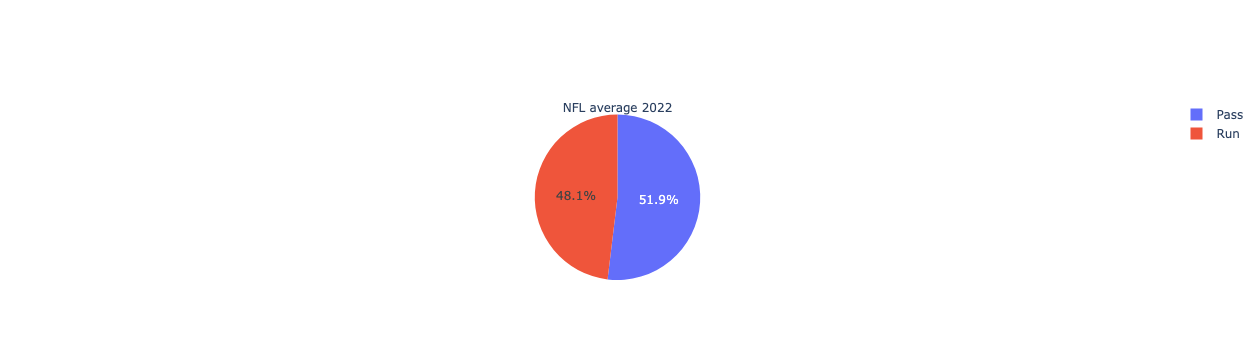

In [47]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, title=f'NFL average {year}')])
fig.show()

In [48]:
print(f'NFL average run:pass ratio when down in {year} = '+str(np.round(no_runs_up/no_passes_up,2)))

NFL average run:pass ratio when down in 2022 = 0.93


## Per team

In [49]:
df_runs_up = df_pbp_up.groupby('posteam')['play_type'].apply(lambda x: (x=='run').sum()).reset_index(name='no of runs')
df_passes_up = df_pbp_up.groupby('posteam')['play_type'].apply(lambda x: (x=='pass').sum()).reset_index(name='no of passes')

In [50]:
df_run_pass_up = df_runs_up.merge(df_passes_up, on="posteam")

In [51]:
df_run_pass_up = df_run_pass_up.merge(df_teams[["team_abbr", "team_color", "team_color2"]], left_on="posteam", right_on="team_abbr")

In [52]:
df_run_pass_up['run pct'] = df_run_pass_up['no of runs']/(df_run_pass_up['no of runs']+df_run_pass_up['no of passes'])*100
df_run_pass_up['pass pct'] = df_run_pass_up['no of passes']/(df_run_pass_up['no of runs']+df_run_pass_up['no of passes'])*100
df_run_pass_up['run-pass ratio'] = df_run_pass_up['no of runs']/df_run_pass_up['no of passes']

### Who runs/passes the most?

In [53]:
df_run_pass_up.sort_values(by=['run-pass ratio'])

posteam  no of runs  no of passes team_abbr team_color team_color2  \
17      LV          13            28        LV    #000000     #A5ACAF   
21      NO          12            21        NO    #D3BC8D     #000000   
18     MIA          19            31       MIA    #008E97     #F58220   
30     WAS          16            26       WAS    #5A1414     #FFB612   
2      BUF          34            53       BUF    #00338D     #C60C30   
25     PIT          22            34       PIT    #000000     #FFB612   
26     SEA          13            20       SEA    #002244     #69be28   
14      KC          39            58        KC    #E31837     #FFB612   
11     HOU          20            28       HOU    #03202F     #A71930   
15      LA          39            52        LA    #003594     #FFD100   
1      BAL          47            62       BAL    #241773     #9E7C0C   
9      DET          44            55       DET    #0076B6     #B0B7BC   
5      CIN          44            52       CIN    #FB4F14     #000000   
10      GB          45            49        GB    #203731     #FFB612   
22     NYG          12            13       NYG    #0B2265     #A71930   
16     LAC          37            40       LAC    #007BC7     #ffc20e   
12     IND          17            18       IND    #002C5F     #a5acaf   
29     TEN          39            41       TEN    #002244     #4B92DB   
20      NE          20            20        NE    #002244     #C60C30   
8      DEN           9             9       DEN    #002244     #FB4F14   
19     MIN          26            25       MIN    #4F2683     #FFC62F   
24     PHI          74            70       PHI    #004C54     #A5ACAF   
28      TB          30            27        TB    #A71930     #322F2B   
13     JAX          57            51       JAX    #006778     #000000   
7      DAL          30            26       DAL    #002244     #B0B7BC   
3      CAR          28            24       CAR    #0085CA     #000000   
27      SF          69            51        SF    #AA0000     #B3995D   
0      ATL          35            23       ATL    #A71930     #000000   
6      CLE          57            31       CLE    #FF3C00     #311D00   
4      CHI          18             4       CHI    #0B162A     #C83803   
23     NYJ           0             0       NYJ    #003F2D     #000000   

      run pct   pass pct  run-pass ratio  
17  31.707317  68.292683        0.464286  
21  36.363636  63.636364        0.571429  
18  38.000000  62.000000        0.612903  
30  38.095238  61.904762        0.615385  
2   39.080460  60.919540        0.641509  
25  39.285714  60.714286        0.647059  
26  39.393939  60.606061        0.650000  
14  40.206186  59.793814        0.672414  
11  41.666667  58.333333        0.714286  
15  42.857143  57.142857        0.750000  
1   43.119266  56.880734        0.758065  
9   44.444444  55.555556        0.800000  
5   45.833333  54.166667        0.846154  
10  47.872340  52.127660        0.918367  
22  48.000000  52.000000        0.923077  
16  48.051948  51.948052        0.925000  
12  48.571429  51.428571        0.944444  
29  48.750000  51.250000        0.951220  
20  50.000000  50.000000        1.000000  
8   50.000000  50.000000        1.000000  
19  50.980392  49.019608        1.040000  
24  51.388889  48.611111        1.057143  
28  52.631579  47.368421        1.111111  
13  52.777778  47.222222        1.117647  
7   53.571429  46.428571        1.153846  
3   53.846154  46.153846        1.166667  
27  57.500000  42.500000        1.352941  
0   60.344828  39.655172        1.521739  
6   64.772727  35.227273        1.838710  
4   81.818182  18.181818        4.500000  
23        NaN        NaN             NaN

#### Yards per run/pass

In [54]:
df_total_yds_up = df_pbp_up.groupby(['play_type','posteam'])['yards_gained'].sum()

In [55]:
df_run_pass_up = df_run_pass_up.merge(df_total_yds_up['run'], on="posteam")
df_run_pass_up = df_run_pass_up.merge(df_total_yds_up['pass'], on="posteam",suffixes=('_run','_pass'))

In [56]:
df_run_pass_up['yds_per_run'] = df_run_pass_up['yards_gained_run'].values/df_run_pass_up['no of runs'].values
df_run_pass_up['yds_per_pass_attempt'] = df_run_pass_up['yards_gained_pass'].values/df_run_pass_up['no of passes'].values

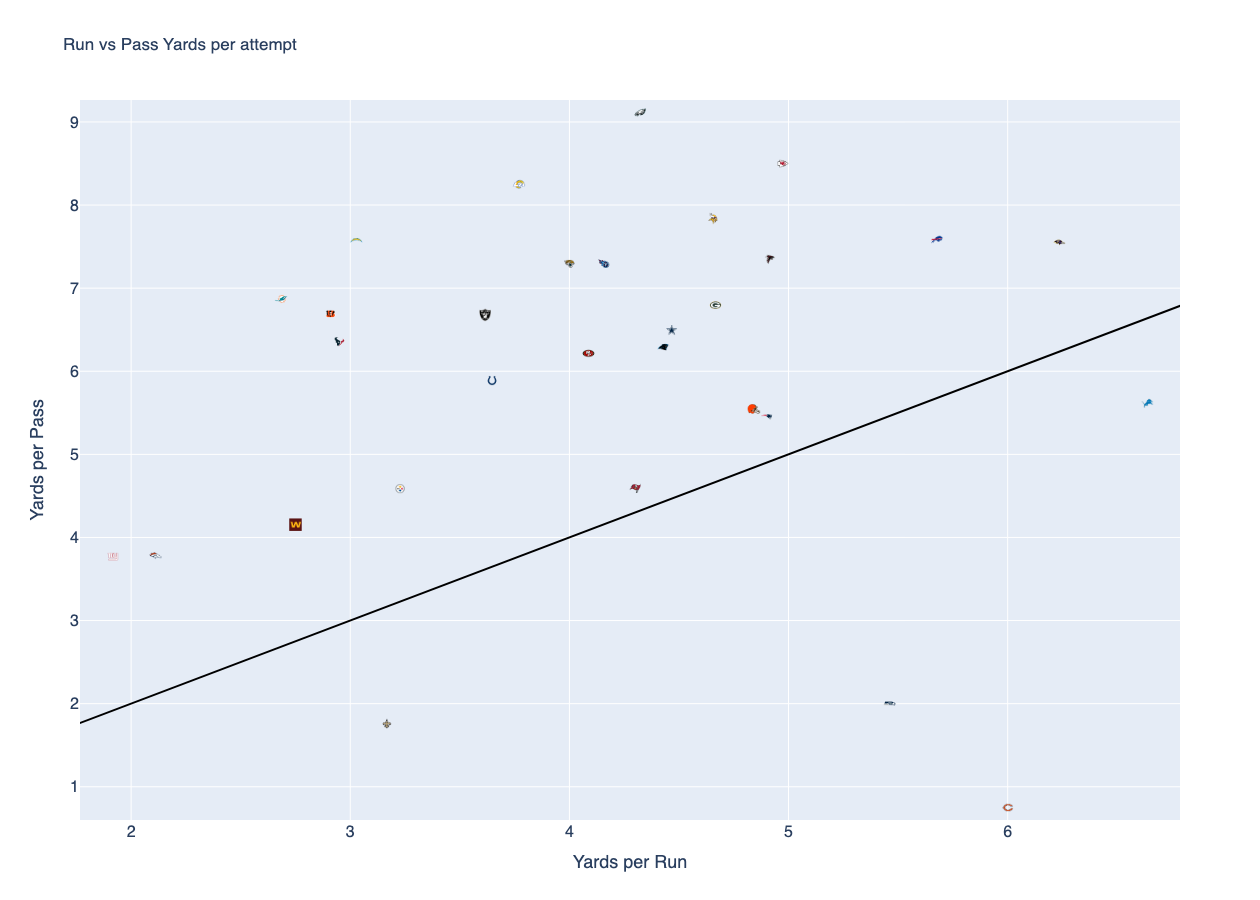

In [57]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass_up['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_up['yds_per_run'][i], 
            y=df_run_pass_up['yds_per_pass_attempt'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_up['yds_per_run'][i]], 
            y=[df_run_pass_up['yds_per_pass_attempt'][i]], 
            name=df_run_pass_up['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_up['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
x=np.linspace(0,10)
y=np.linspace(0,10)

fig.add_trace(
        go.Scatter(
            x=x, 
            y=y, 
            name='1x1', 
            mode="lines",
            line = dict(color='black')
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )

fig.update_xaxes(range=[np.nanmin(df_run_pass_up['yds_per_run'])-marginx, np.nanmax(df_run_pass_up['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_up['yds_per_pass_attempt'])-marginy, np.nanmax(df_run_pass_up['yds_per_pass_attempt'])+marginy])
                    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run vs Pass Yards per attempt',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Yards per Pass",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=900,
    width=1000,
    showlegend=False
)
        
fig.show()

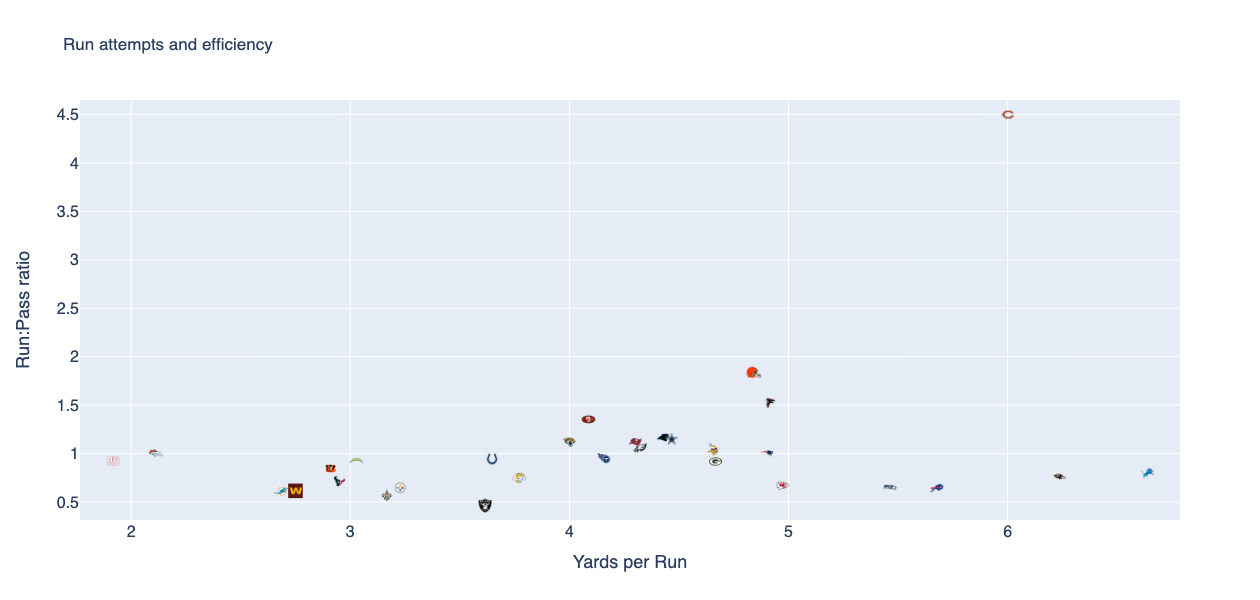

In [58]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass_up['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_up['yds_per_run'][i], 
            y=df_run_pass_up['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_up['yds_per_run'][i]], 
            y=[df_run_pass_up['run-pass ratio'][i]], 
            name=df_run_pass_up['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_up['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_up['yds_per_run'])-marginx, np.nanmax(df_run_pass_up['yds_per_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_up['run-pass ratio'])-marginy, np.nanmax(df_run_pass_up['run-pass ratio'])+marginy])
 

fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Run attempts and efficiency',
    xaxis_title_text="Yards per Run",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

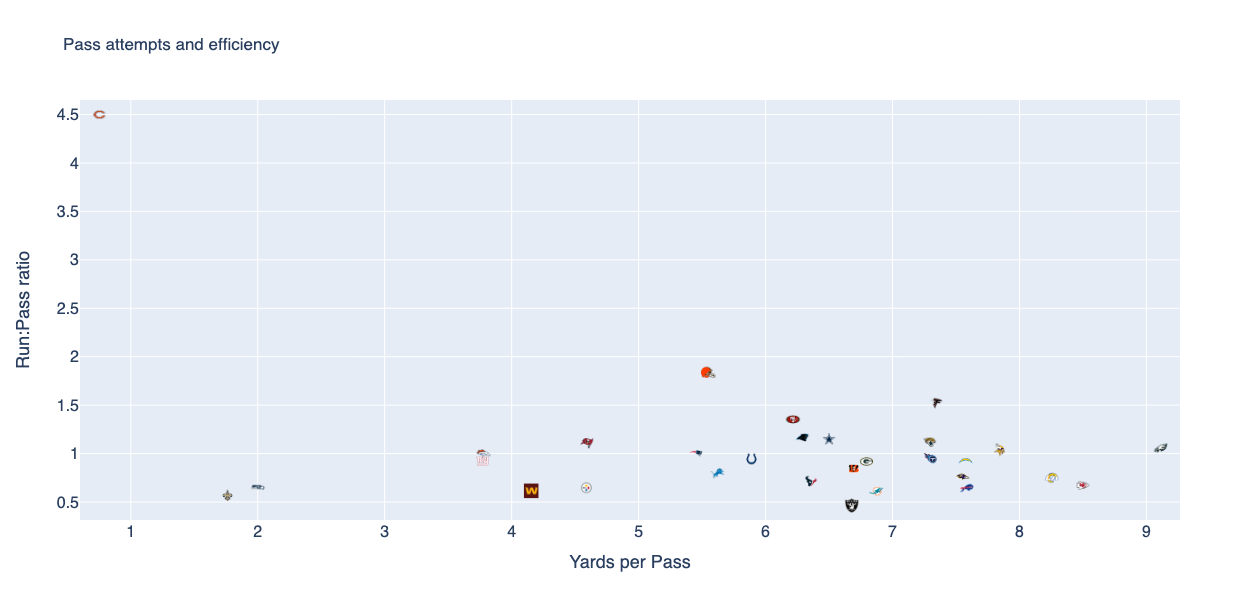

In [59]:
fig = go.Figure()

dx=0.15
marginx=0.15
marginy=0.15

for i,team in enumerate(df_run_pass_up['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_up['yds_per_pass_attempt'][i], 
            y=df_run_pass_up['run-pass ratio'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_up['yds_per_pass_attempt'][i]], 
            y=[df_run_pass_up['run-pass ratio'][i]], 
            name=df_run_pass_up['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_up['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_up['yds_per_pass_attempt'])-marginx, np.nanmax(df_run_pass_up['yds_per_pass_attempt'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_up['run-pass ratio'])-marginy, np.nanmax(df_run_pass_up['run-pass ratio'])+marginy])
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Pass attempts and efficiency',
    xaxis_title_text="Yards per Pass",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Run:Pass ratio",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=600,
    width=1000,
    showlegend=False
)
        
fig.show()

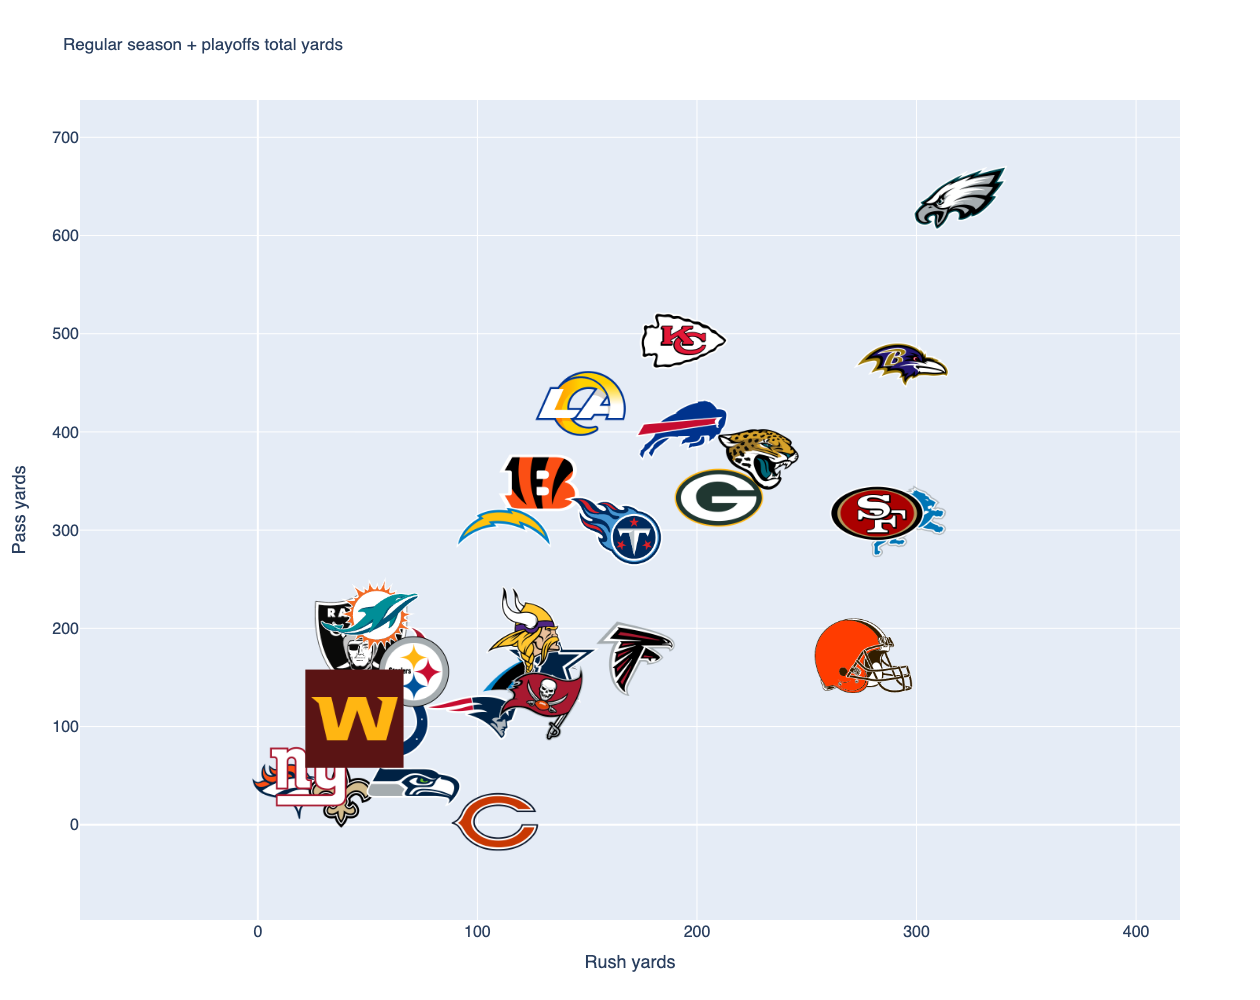

In [60]:
fig = go.Figure()

dx=100
marginx=100
marginy=100

for i,team in enumerate(df_run_pass_up['posteam']):
    fig.add_layout_image(
        dict(
            source=f"https://static.nfl.com/static/content/public/static/wildcat/assets/img/logos/teams/{team}.svg",
            xref="x",
            yref="y",
            x=df_run_pass_up['yards_gained_run'][i], 
            y=df_run_pass_up['yards_gained_pass'][i], 
            sizex=dx, sizey=dx,
            xanchor="center", yanchor="middle"
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[df_run_pass_up['yards_gained_run'][i]], 
            y=[df_run_pass_up['yards_gained_pass'][i]], 
            name=df_run_pass_up['posteam'][i], 
            mode="markers", 
            marker=dict(size=0.1,
                        color=df_run_pass_up['team_color'][i])
            # fill=df_run_pass['team_color'][i],
            # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
        )
    )
    
fig.update_xaxes(range=[np.nanmin(df_run_pass_up['yards_gained_run'])-marginx, np.nanmax(df_run_pass_up['yards_gained_run'])+marginx])
fig.update_yaxes(range=[np.nanmin(df_run_pass_up['yards_gained_pass'])-marginy, np.nanmax(df_run_pass_up['yards_gained_pass'])+marginy])

# for i in range(len(df_run_pass)):
#     fig.add_trace(
#         go.Scatter(
#             x=[df_run_pass['yards_gained_run'][i]], 
#             y=[df_run_pass['yards_gained_pass'][i]], 
#             name=df_run_pass['posteam'][i], 
#             mode="markers", 
#             marker=dict(size=15,
#                         color=df_run_pass['team_color'][i],
#                         symbol=df_run_pass['marker_style'][i])
#             # fill=df_run_pass['team_color'][i],
#             # hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
#         )
#     )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    title='Regular season + playoffs total yards',
    xaxis_title_text="Rush yards",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Pass yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000,
    showlegend=False
)
        
fig.show()

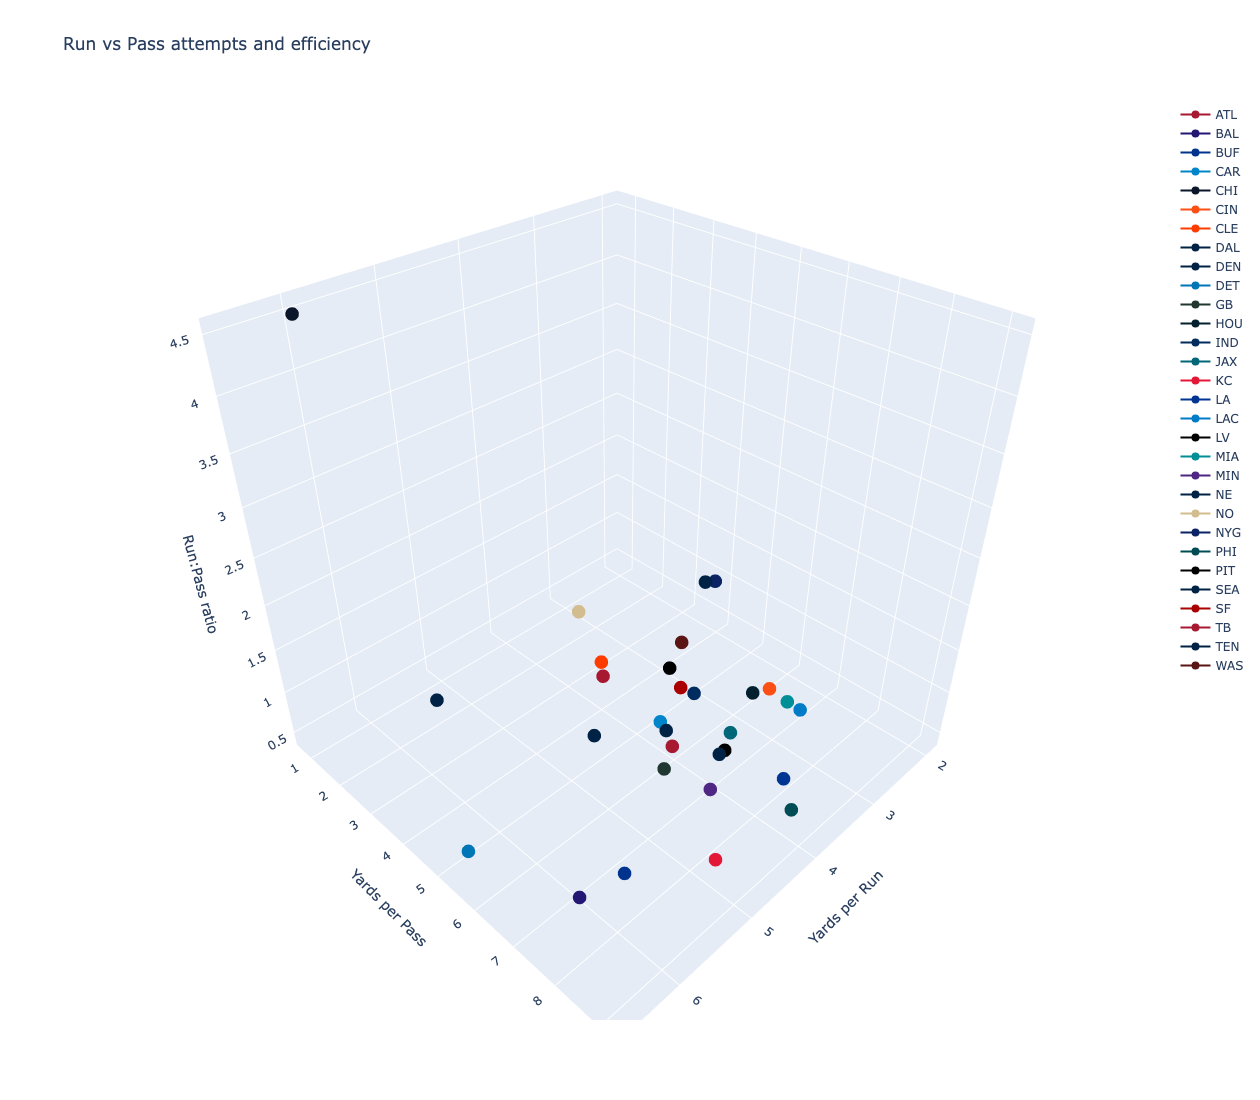

In [61]:
fig = go.Figure()

for i in range(len(df_run_pass_up)):
    fig.add_trace(
        go.Scatter3d(x=[df_run_pass_up['yds_per_run'][i]], 
                     y=[df_run_pass_up['yds_per_pass_attempt'][i]],
                     z=[df_run_pass_up['run-pass ratio'][i]],
                     name=df_run_pass_up['posteam'][i], 
                    # mode="markers", 
                    marker=dict(size=8,
                        color=df_run_pass_up['team_color'][i])))
# fig.update_layout(
#     font_family="Averta, sans-serif",
#     hoverlabel_font_family="Averta, sans-serif",
#     xaxis_title_text="Yards per Run",
#     xaxis_title_font_size=18,
#     xaxis_tickfont_size=16,
#     yaxis_title_text="Yards per Pass",
#     yaxis_title_font_size=18,
#     yaxis_tickfont_size=16,
#     hoverlabel_font_size=16,
#     legend_font_size=16,
#     height=1000,
#     width=1000
# )

fig.update_layout(scene_aspectmode='cube',
                  title='Run vs Pass attempts and efficiency',
                 scene = dict(
                    xaxis_title='Yards per Run',
                    yaxis_title='Yards per Pass',
                    zaxis_title='Run:Pass ratio'),
                 width=1100,
                 height=1100)


fig.show()

## Redzone